In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('med-insurance.csv')
data.shape

(1338, 7)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Use Label Encoder to encode Categorical Columns

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])

# lets check the head again
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


### Check the Distribution of Expenses Column

C:\Users\Nazhan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

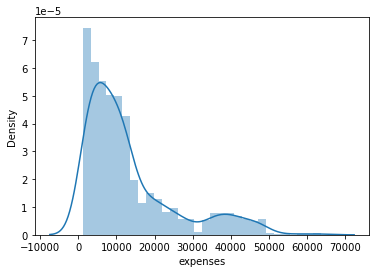

In [5]:
import seaborn as sns
sns.distplot(data['expenses'])

### Apply Log Transformation into the Expenses Column

C:\Users\Nazhan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

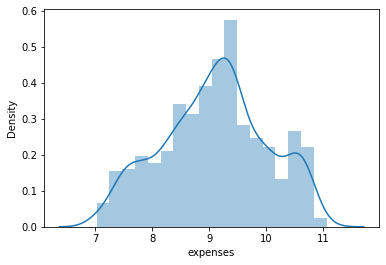

In [6]:
data['expenses'] = np.log1p(data['expenses'])

# lets again check the Distribution
sns.distplot(data['expenses'])

### Apply Splitting

In [7]:
y = data['expenses']
x = data.drop(['expenses'], axis = 1)

print(x.shape)
print(y.shape)

(1338, 6)
(1338,)


In [8]:
# lets perform train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


### Apply Standard Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Apply Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

### Evaluate the Model Performance

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(r2)

0.7890687945605839
